# Comparison of PI simulation with step change in setpoint and ambient temperature based on simulation in OpenModelica and simulation in Python based on the use of a FMU.

In [1]:
#Import of libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data import and construction of data frames

In [2]:
# Import the csv file that holds the exported data from simulating PID controller in OpenModelica
dfOpenModPID = pd.read_csv('datafiles/exportedPIDsimulationFromOpenModelica.csv')

# Rename column names of datafram
dfOpenModPID.rename(columns = {'airHeaterTextWithIO.u_ext':'controlSignalOME',
                               'airHeaterTextWithIO.T_Out_ext':'outputTemperatureOME',
                              'airHeaterTextWithIO.T_amb_ext':'ambienteTemperatureOME'}, inplace = True)
   

# Import the csv file that holds the simulation data from simulating PID controller in Python with FMU
dfFMUpythonPID = pd.read_csv("datafiles/airHeaterPIDsimulation.csv")

## Calculate statistics and writing results to file

In [3]:
# Remove the percentiles from the output
perc = []

# Gather statistical propertis of both data frames
descOMPI = dfOpenModPID.describe(percentiles=perc)
descPythonPI = dfFMUpythonPID.describe(percentiles=perc)

# Merge the statistical properties
merged_desc = pd.concat([descOMPI, descPythonPI], keys=['dfOpenModPID', 'dfFMUpythonPID'], axis=1)

# Resetting index for better formatting
merged_desc.reset_index(inplace=True)


# Export the merged statistical properties to a CSV file
merged_desc.to_excel('datafiles/describeExport.xlsx', index=True)

# Print the stats
print(merged_desc)

   index   dfOpenModPID                                        \
                   time controlSignalOME outputTemperatureOME   
0  count  600008.000000    600008.000000        600008.000000   
1   mean     299.999177         1.477942            23.279399   
2    std     173.205508         0.947084             2.386166   
3    min       0.000000         0.000000            19.632542   
4    50%     299.997500         1.999926            25.000000   
5    max     600.000000         5.000000            25.942111   

                                        dfFMUpythonPID                 \
  ambienteTemperatureOME    Reference.y         # time  controlSignal   
0          600008.000000  600008.000000  600001.000000  600001.000000   
1              18.333336      23.333322     300.001000       1.485131   
2               0.745359       2.357028     173.205514       0.975682   
3              18.000000      20.000000       0.001000       0.000000   
4              18.000000      25.000000  

## Modify frames

In [4]:
# Drop last 7 lines from OpenModelica datafram to make both frames at equal length
n = 7
 
# Dropping last n rows using drop
dfOpenModPID.drop(dfOpenModPID.tail(n).index,
        inplace = True)

In [5]:
# Generate a new dataframe to evaluate the difference between the different FMUs temperature output and the Modelica simulation
dfTFMU_PID_diff = dfOpenModPID[['time']].copy()

# Calculate the difference between Python and OpenModelica - Control signal
dfTFMU_PID_diff['ControlSignalDiff'] = dfFMUpythonPID['controlSignal'] - dfOpenModPID['controlSignalOME']

# Calculate the difference between Python and OpenModelica - Output temperature
dfTFMU_PID_diff['OutputTemperatureDiff'] = dfFMUpythonPID['outputTemperature'] - dfOpenModPID['outputTemperatureOME']

# Calculate the difference between Python and OpenModelica - Ambiente temperature
dfTFMU_PID_diff['AmbienteTemperature'] = dfFMUpythonPID['ambienteTemperature'] - dfOpenModPID['ambienteTemperatureOME']

## Plotting

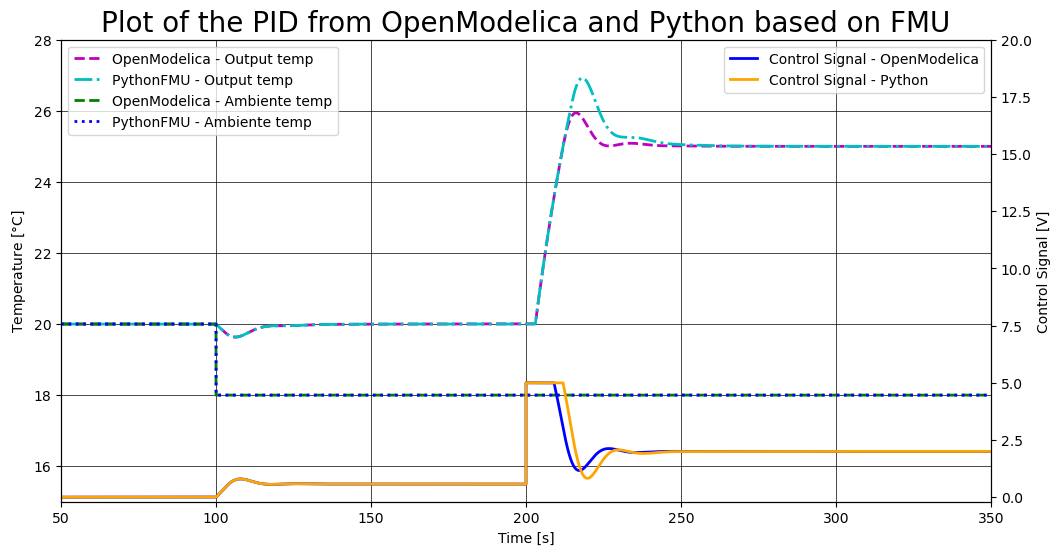

In [6]:
# Plotting of the output temperature and control signal for both FMU and Modelica model
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Plot of the PID from OpenModelica and Python based on FMU', fontsize=20)

# convert to dual y-axises
ax2 = ax1.twinx()

#Range of both X-axises
ax1.set_ylim(15, 28);
ax2.set_ylim(-0.2, 20);

# Set up the axis labels
ax1.set_xlabel('Time [s]')
ax1.set_ylabel((r'Temperature [$\degree$C]'))
ax2.set_ylabel('Control Signal [V]')

# Customize the major grid (outer grid)
ax1.grid(which='both', linestyle='-', linewidth='0.5', color='black')

# Set up data to be plotted with additional parameters
ax1.plot(dfTFMU_PID_diff.time, dfOpenModPID.outputTemperatureOME,  'm', linestyle='--', label='OpenModelica - Output temp', linewidth=2)
ax1.plot(dfTFMU_PID_diff.time, dfFMUpythonPID.outputTemperature,  'c', linestyle='-.', label='PythonFMU - Output temp', linewidth=2)
ax1.plot(dfTFMU_PID_diff.time, dfOpenModPID.ambienteTemperatureOME,  'g', linestyle='--', label='OpenModelica - Ambiente temp', linewidth=2)
ax1.plot(dfTFMU_PID_diff.time, dfFMUpythonPID.ambienteTemperature,  'b', linestyle=':', label='PythonFMU - Ambiente temp', linewidth=2)

ax2.plot(dfTFMU_PID_diff.time, dfOpenModPID.controlSignalOME, 'blue', linestyle='-', label='Control Signal - OpenModelica', linewidth=2)
ax2.plot(dfTFMU_PID_diff.time, dfFMUpythonPID.controlSignal, 'orange', linestyle='-', label='Control Signal - Python', linewidth=2)

# Set x-axis limits to include only data up to 300 seconds
ax1.set_xlim(50, 350)
ax2.set_xlim(50, 350)

# Configure placement of data legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save a copy of the plot
plt.savefig('plots/pltComparePyFMUandOpenModPID.png', dpi=300, bbox_inches='tight')

plt.show()

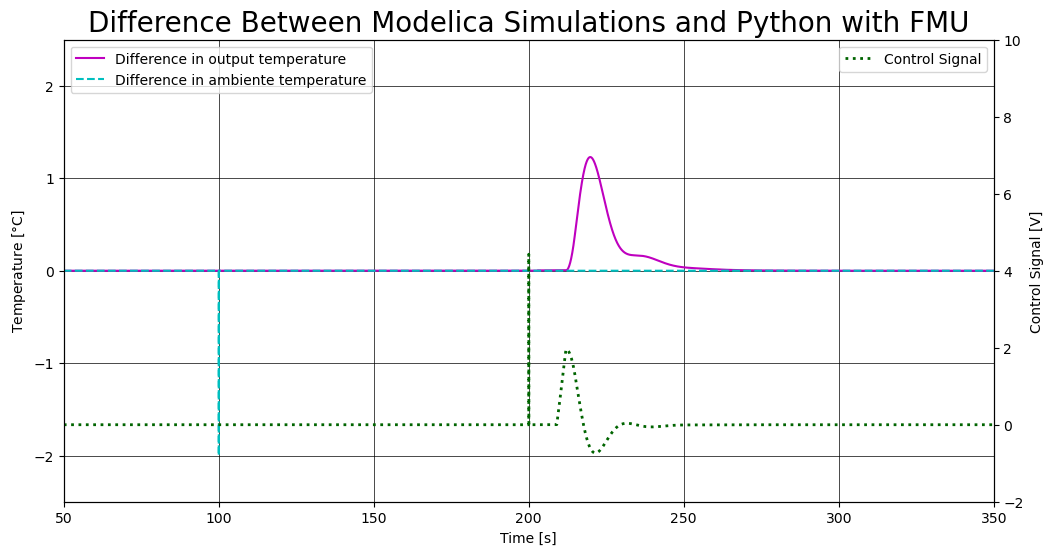

In [8]:
# Plotting of the output difference in temperature from the Python FMU and OpenModelica
fig, ax3 = plt.subplots(figsize=(12, 6));

# Plotting of the output difference in temperature and control signal
plt.title('Difference Between Modelica Simulations and Python with FMU', fontsize=20);

# convert to dual y-axises
ax4 = ax3.twinx();

#Range of both X-axises
ax3.set_ylim(-2.5, 2.5);
ax4.set_ylim(-2, 10);

# Set up the axis labels
ax3.set_xlabel('Time [s]')
ax3.set_ylabel((r'Temperature [$\degree$C]'))
ax4.set_ylabel('Control Signal [V]')

# Customize the major grid (outer grid)
ax3.grid(which='both', linestyle='-', linewidth='0.5', color='black')

# Set up data to be plotted with additional parameters
ax3.plot(dfTFMU_PID_diff.time, dfTFMU_PID_diff.OutputTemperatureDiff, 'm-', label='Difference in output temperature', linewidth=1.5)
ax3.plot(dfTFMU_PID_diff.time, dfTFMU_PID_diff.AmbienteTemperature, 'c', linestyle='--', label='Difference in ambiente temperature', linewidth=1.5)

ax4.plot(dfTFMU_PID_diff.time, dfTFMU_PID_diff.ControlSignalDiff, 'darkgreen', linestyle=':', label='Control Signal', linewidth=2)

# Configure placement of data legends
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

# Set x-axis limits to include only data up to 300 seconds
ax3.set_xlim(50, 350)
ax4.set_xlim(50, 350)

# Save a copy of the plot
plt.savefig('plots/pltCompareDIFFPyFMUandOpenModPID.png', dpi=300, bbox_inches='tight')

plt.show()